<a href="https://colab.research.google.com/github/nilesh07g/Project/blob/main/CARS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"🚀 ACCELERATING ACCURACY: AIML IN CAR EVALUATION 🚗📈🔍"**

IMPORTING **LIBRARIES**

In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

***🤩 LOAD DATASET***:

In [398]:
# Load the dataset
df = pd.read_csv('car_evaluation.csv', header=None)


🧾 ADD COLOMN NAMES

In [399]:
# Define column names
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df.columns = column_names

**DEFINE ➡️ X & Y**

In [400]:
# Select features and target variable
X = df[['buying', 'maint', 'safety']].values
Y = df[['class']]
print(X,Y)

[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


 **🔍 ANALYSE 'Y'**

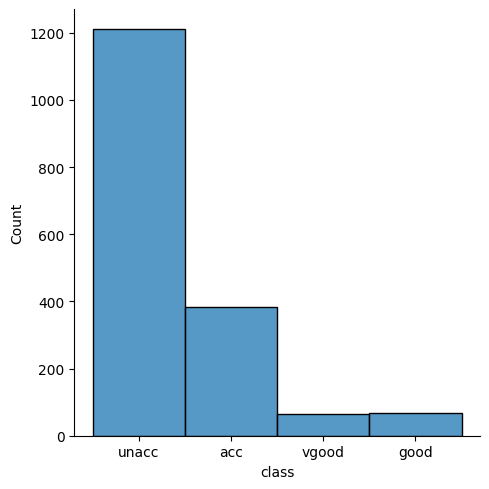

In [401]:
sns.displot(df['class'])

**LABEL ENCODE: 🚀🧠**

In [402]:
# Encode categorical labels to numerical values
le = preprocessing.LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = le.fit_transform(X[:, i])

**MAPPING🗺️🌍**

In [403]:
#dictionary
label_mapping = {'unacc':0,'acc':1,'good':2,'vgood':3,}
Y['class'] = Y['class'].map(label_mapping)
Y = np.array(Y)
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


<ipython-input-403-a2f4d47ee9de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['class'] = Y['class'].map(label_mapping)


**SPLIT DATA ✂️**

In [404]:
# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)



(1382, 3)
(346, 3)
(1382, 1)
(346, 1)


**KNN MODEL🤖**

In [405]:
# Define a range of K values to try
k_values = list(range(1, 31))


In [406]:
# Initialize variables to store results
best_k = None
best_accuracy = 0

**🔁ITERATE  'K'  VALUES**

In [407]:
# Iterate over different K values and evaluate the model
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(X_train, Y_train)
    accuracy = knn.score(X_val, Y_val)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [408]:
# Print the best K value and its corresponding accuracy
print(f"Best K value: {best_k}")
print(f"Accuracy with best K: {best_accuracy}")


Best K value: 12
Accuracy with best K: 0.7196531791907514


**TRAIN DATA 📊**

In [409]:
# Train the final model with the best K value
final_knn = KNeighborsClassifier(n_neighbors=best_k, weights='uniform').fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**PREDICTION 🔮**

In [410]:
# Make predictions on the validation set with the final model
final_prediction = final_knn.predict(X_val)


In [411]:
# Create a DataFrame to compare actual and predicted values
df1 = pd.DataFrame({'actual': Y_val.ravel(), 'predicted': final_prediction})
df1


,actual,predicted
0,0,1
1,1,0
2,0,0
3,1,1
4,0,0
...,...,...
341,0,0
342,0,0
343,0,0
344,0,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df1, *['actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df1, *['predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df1, *['actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df1, *['predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df1, *[[['actual', 'predicted']]], **{})
chart

# **THANK YOU!🙏🙌**

